In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import io
from keras.models import Sequential

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import pandas as pd

In [ ]:
pip install torch_optimizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00


In [ ]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from torch import inverse
from torch_optimizer import Optimizer

In [ ]:
price_tom = []

In [ ]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [ ]:
crypto_currency

'BTC'

In [ ]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [ ]:
import yfinance as yf

In [ ]:
data  = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) # Scaling data between 0 and 1 to make it easy for nn to work
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.40382002],
       [0.39613774],
       [0.3942466 ]])

In [ ]:
prediction_days = 60 # the number of days to predict the crypto on
future_day = 30

x_train,y_train = [],[]

for x in range(prediction_days,len(scaled_data)):
# for x in range(prediction_days,len(scaled_data)-future_day):  # unlock for a specific day after
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    # y_train.append(scaled_data[x+future_day,0]) # unlock this too

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.20))
model.add(LSTM(units=50))
model.add(Dropout(0.20))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')


model.fit(x_train,y_train,epochs=3,batch_size=32)

Epoch 1/3
102/102 [==============================] - 19s 98ms/step - loss: 0.0054
Epoch 2/3
102/102 [==============================] - 9s 86ms/step - loss: 0.0023
Epoch 3/3
102/102 [==============================] - 10s 96ms/step - loss: 0.0019


In [ ]:
test_start = dt.datetime(2020,1,1)

test_end = dt.datetime.now()

test_data = yf.download('BTC-USD', start=test_start, end=test_end)


actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)



model_inputs = total_dataset[len(total_dataset)-len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


[*********************100%%**********************]  1 of 1 completed


In [ ]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [ ]:
import seaborn as sns

In [ ]:

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

44/44 [==============================] - 3s 36ms/step


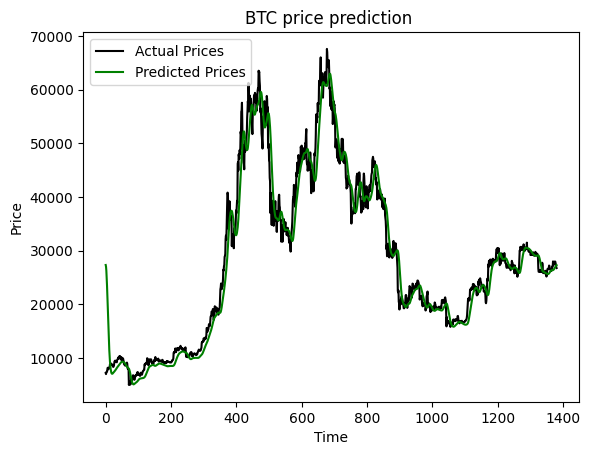

In [ ]:
plt.plot(actual_prices,color='black',label='Actual Prices')
plt.plot(prediction_prices,color='green',label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
real_data = [model_inputs[len(model_inputs) - prediction_days : len(model_inputs)+1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print('{} Price Tomorrow = {} {}'.format(crypto_currency,prediction[0,0],against_currency))

1/1 [==============================] - 0s 27ms/step
BTC Price Tomorrow = 27315.54296875 USD


3240369.53

In [ ]:
real_data = [model_inputs[len(model_inputs) - prediction_days : len(model_inputs)+1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print('{} Price Tomorrow = {} {}'.format(crypto_currency,prediction[0,0],against_currency))

1/1 [==============================] - 0s 202ms/step
BTC Price Tomorrow = 27315.54296875 USD


3257036

In [ ]:
real_data = [model_inputs[len(model_inputs) - prediction_days : len(model_inputs)+1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print('{} Price Tomorrow = {} {}'.format(crypto_currency,prediction[0,0],against_currency))

1/1 [==============================] - 0s 128ms/step
BTC Price Tomorrow = 27315.54296875 USD


In [ ]:
#"15 epi
real_data = [model_inputs[len(model_inputs) - prediction_days : len(model_inputs)+1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print('{} Price Tomorrow = {} {}'.format(crypto_currency,prediction[0,0],against_currency))

1/1 [==============================] - 0s 39ms/step
BTC Price Tomorrow = 27315.54296875 USD


3389750

In [ ]:
print(actual_prices)

[ 7200.17431641  6985.47021484  7344.88427734 ... 27391.01953125
 26873.3203125  26747.44335938]


In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

model = Sequential()

model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=3, batch_size=32)


NameError: ignored

In [ ]:
# Print the first few rows of your DataFrame
print(data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a dataset called 'data' with features and targets
x = data[['High', 'Low']]
y = data['Volume']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


21/21 [==============================] - 3s 5ms/step


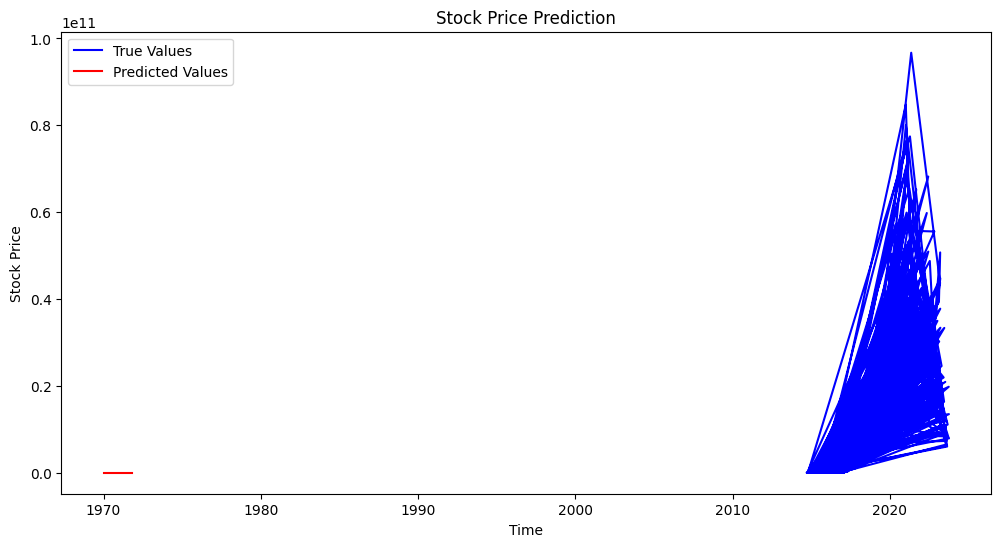

In [ ]:
import matplotlib.pyplot as plt

predicted_values = model.predict(x_test)

plt.figure(figsize=(12, 6))

plt.plot(y_test, color='blue', label='True Values')

plt.plot(predicted_values, color='red', label='Predicted Values')

plt.title('Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()

plt.show()
